In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.stats as spstats
from scipy.special import comb

[0.999247456541835, 0.9929762610571267, 0.9678914791182933, 0.9037859252746081, 0.7862590765611852, 0.6217214883623932, 0.4389019459192909, 0.27349378847076977, 0.14943767038437894, 0.07132826270035508, 0.02966991193554236, 0.010734297951536576, 0.0033704480688676597, 0.0009158314413113544, 0.00021451240486669576, 4.307886262466809e-05, 7.363541324245659e-06, 1.0608375653475832e-06, 1.2710367514046084e-07, 1.2434600904498438e-08, 9.676934809021986e-10, 5.7621463156465325e-11, 2.4655832930875476e-12, 6.750155989720952e-14, 8.881784197001252e-16]


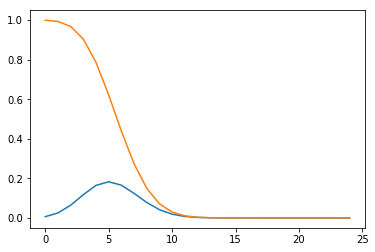

In [167]:
p_right = 0.25
p_wrong = 0.75

freq = [comb(25,i) for i in range(1,26)]
total = sum(freq)

probs = [(comb(25,i)*(p_right**i)*(p_wrong**(25-i))) for i in range(1,26)]

probs_cum = [sum(probs[i:]) for i in range(25)]
#probs = [x/sum(probs) for x in probs]

plt.plot(probs)
plt.plot(prob_cum)
plt.show()

0.0033704480688676597


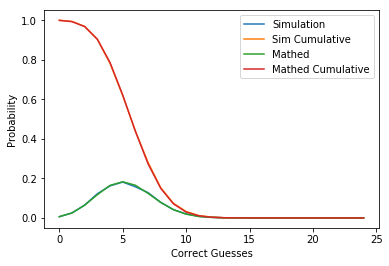

1 0.006 1.000 0.006
2 0.025 0.994 0.025
3 0.065 0.969 0.064
4 0.122 0.904 0.118
5 0.162 0.782 0.165
6 0.181 0.620 0.183
7 0.158 0.438 0.165
8 0.128 0.281 0.124
9 0.079 0.153 0.078
10 0.042 0.074 0.042
11 0.020 0.032 0.019
12 0.008 0.012 0.007
13 0.003 0.004 0.002
14 0.001 0.001 0.001
15 0.000 0.000 0.000
16 0.000 0.000 0.000
17 0.000 0.000 0.000
18 0.000 0.000 0.000
19 0.000 0.000 0.000
20 0.000 0.000 0.000
21 0.000 0.000 0.000
22 0.000 0.000 0.000
23 0.000 0.000 0.000
24 0.000 0.000 0.000
25 0.000 0.000 0.000


In [168]:
rights = []
for i in range(20000):
    right = 0
    for j in range(1,26):
        card = np.random.randint(1,5)
        guess = np.random.randint(1,5)
        if guess == card: right+=1

    rights.append(right)

dist = []
for i in range(1,26):
    dist.append(rights.count(i))
    
dist = [x/sum(dist) for x in dist]
dist_cum = [sum(dist[i:]) for i in range(25)]
plt.plot(dist, label = 'Simulation')
plt.plot(dist_cum, label = 'Sim Cumulative')
plt.plot(probs, label = 'Mathed')
plt.plot(probs_cum, label = 'Mathed Cumulative')
print(sum(probs[12:]))
plt.xlabel('Correct Guesses')
plt.ylabel('Probability')
plt.legend()
plt.show()

for i,d,dc, p in zip(range(1,26),dist, dist_cum,probs ):
    print('{0:d} {1:0.3f} {2:0.3f} {3:0.3f}'.format(i, d,dc, p))

0.9999999999999987


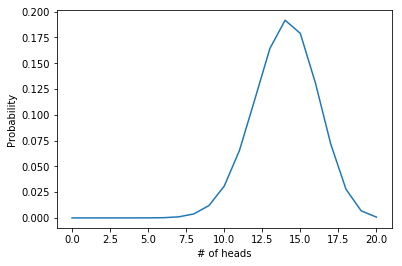

In [10]:
alpha = 0.05

n = 20 
#Probability distribution for the number of heads observed for fair coin
fair_coin = [(comb(n,i)*(0.7**i)*(0.3**(n-i))) for i in range(0,n+1)]
print(sum(fair_coin)) #dummy check to make sure distribution adds to 1

plt.plot(fair_coin)
plt.xlabel('# of heads')
plt.ylabel('Probability')
plt.show()

Probability of at least 14 heads: 19.16%
Threshold significant level: 5.00%
We fail to reject the Null Hypothesis of a fair coin


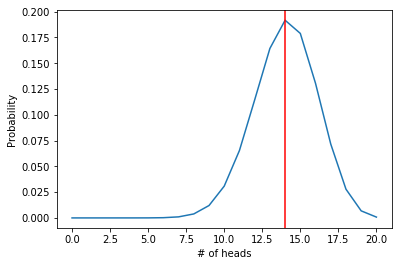

In [13]:
#Observation to test
H = 14
probH = fair_coin[H] #Probability of flipping at least H heads

print('Probability of at least {0:d} heads: {1:0.2f}%'.format(H,probH*100))
print('Threshold significant level: {0:0.2f}%'.format(alpha*100))
if probH <= alpha: print('Reject Null Hypothesis of a fair coin')
if probH > alpha: print('We fail to reject the Null Hypothesis of a fair coin')

plt.plot(fair_coin)
plt.xlabel('# of heads')
plt.ylabel('Probability')
plt.axvline(x=H, color = 'red')
plt.show()
